In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('aguaprieta2',skiprows=20,skipfooter=1, sep='\s+',header=None,
               names=['DD/MM/YY','PRECIP','EVAP','TMAX','TMIN'],engine='python')

In [4]:
df.head()

,DD/MM/YY,PRECIP,EVAP,TMAX,TMIN
0,01/02/1961,0.0,NaN,19.5,2.0
1,02/02/1961,0.0,NaN,20.0,2.5
2,03/02/1961,0.0,2.7,21.5,1.8
3,04/02/1961,0.0,3.0,16.7,1.0
4,05/02/1961,0.0,1.3,11.4,4.0


In [5]:
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/YY'], 1), dayfirst=True)
df=df.drop(['DD/MM/YY'],1)

In [6]:
df.head()

,PRECIP,EVAP,TMAX,TMIN,FECHA
0,0.0,NaN,19.5,2.0,1961-02-01
1,0.0,NaN,20.0,2.5,1961-02-02
2,0.0,2.7,21.5,1.8,1961-02-03
3,0.0,3.0,16.7,1.0,1961-02-04
4,0.0,1.3,11.4,4.0,1961-02-05


In [7]:
df['MES'] = df['FECHA'].dt.month

In [8]:

df['AÑO']=df['FECHA'].dt.year

In [9]:
df['TPROM']=(df['TMAX']+df['TMIN'])/2
df['TDIF']=df['TMAX']-df['TMIN']

In [10]:
df.head()

,PRECIP,EVAP,TMAX,TMIN,FECHA,MES,AÑO,TPROM,TDIF
0,0.0,NaN,19.5,2.0,1961-02-01,2,1961,10.75,17.5
1,0.0,NaN,20.0,2.5,1961-02-02,2,1961,11.25,17.5
2,0.0,2.7,21.5,1.8,1961-02-03,2,1961,11.65,19.7
3,0.0,3.0,16.7,1.0,1961-02-04,2,1961,8.85,15.7
4,0.0,1.3,11.4,4.0,1961-02-05,2,1961,7.70,7.4


In [60]:
#1 número de dias con heladas por año, por heladas se refieren a que la tmin sea menor a cero
arregloaños=[]
arreglodias=[]
dias=0
for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    dfaño=df[df["AÑO"]==i]
    for j in dfaño.index:
        if (dfaño["TMIN"][j]<=0):
            dias=dias+1
    arreglodias.append(dias)
    arregloaños.append(i)
    dias=0

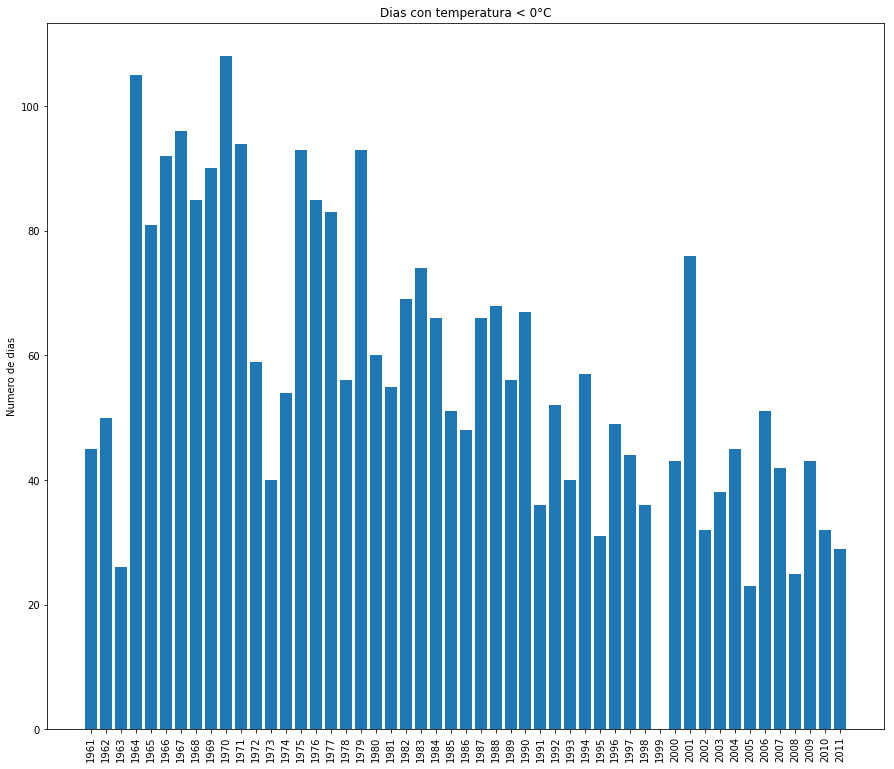

In [61]:
plt.figure(figsize = (15, 13))
plt.bar(np.arange(len(arregloaños)),arreglodias)
plt.title("Dias con temperatura < 0°C")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(arregloaños)), range(arregloaños[0],arregloaños[len(arregloaños)-1]+1), rotation = 90)
plt.show()

In [13]:

veraño=[]
verdia=[]
dia2=0

for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1): #el primer loop donde calculamos los años
    dfver=df[df["AÑO"]==i]                           #crea un nuevo datadrame que parte mi dataframe original en la parte donde año=i
    for j in dfver.index:                            #usa los indices para hacer el segundo loop
        if(dfver["TMAX"][j]>=20):                    #agarra el dataframe nuevo y en el renglon donde el indice sea igual a j aplicar el if
            dia2=dia2+1
                
    verdia.append(dia2)
    veraño.append(i) 
    dia2=0
            
            

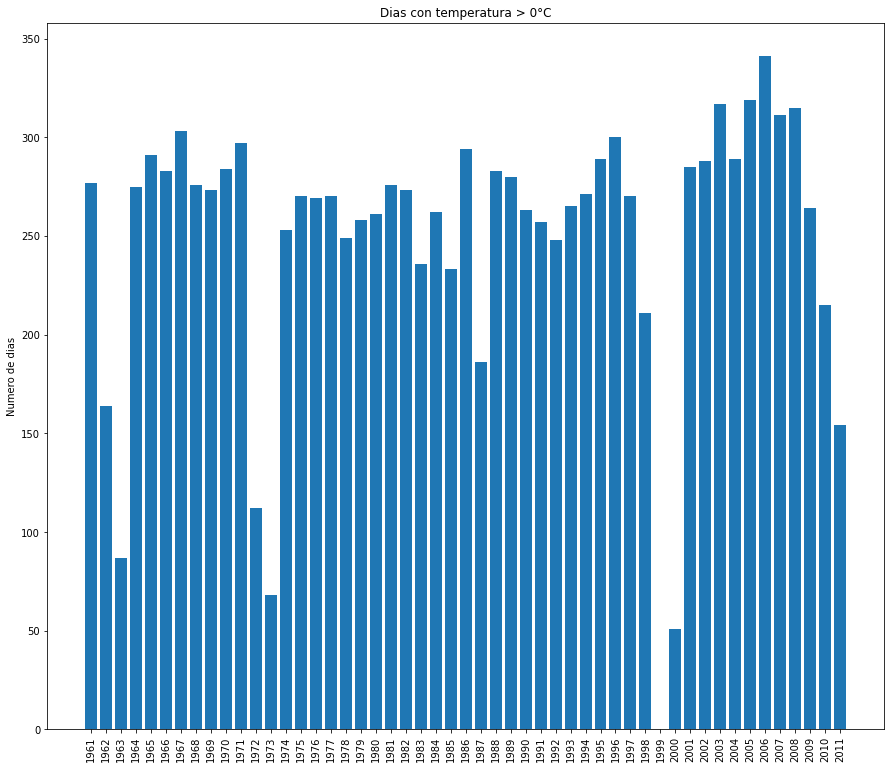

In [63]:
plt.figure(figsize = (15, 13))
plt.bar(np.arange(len(veraño)),verdia)
plt.title("Dias con temperatura > 0°C")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(veraño)), range(veraño[0],veraño[len(veraño)-1]+1), rotation = 90)
plt.show()

In [67]:
#punto 3, donde buscamos los dias donde en la temp minima estaba arriba de 20
dias=0
nochehot=[]

for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    dfpapa=df[df["AÑO"]==i]
    for j in dfpapa.index:
        if(dfpapa["TMIN"][j]>=20):
            dias=dias+1

    nochehot.append(dias)
    dias=0

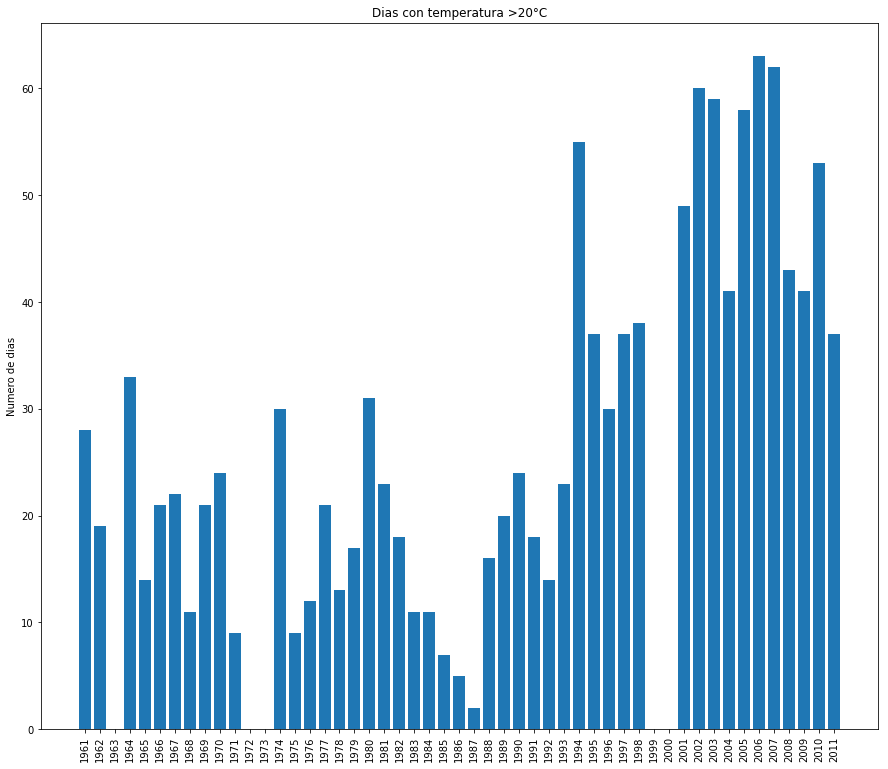

In [68]:
plt.figure(figsize = (15, 13))
plt.bar(np.arange(len(veraño)),nochehot)
plt.title("Dias con temperatura >20°C")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(veraño)), range(veraño[0],veraño[len(veraño)-1]+1), rotation = 90)
plt.show()

In [44]:
#aqui se contestará la quinta parte de la actividad
#el cual nos pide encontrar el máximo y mínimo de cada mes

#se crean dos funciones, uno para el maximo y otro para los mínimos


def maxmensual(col,año0,añof):
    maximo=[]                                     #el arreglo donde se guardaran los datos
    maxi = -1000                                  #es un cinturon de seguridad
    for i in range(año0,añof+1):
            dfaño=df[df["AÑO"]==i]             #vamos a crear un data frame donde cuando el año sea igual a i se guarda en dfmax
            for j in range(1,13):                 #este for es para que pase por los meses
                dfmes=dfaño[dfaño["MES"]==j]
                for k in dfmes.index:
                    if(dfmes[col][k]>maxi):
                        maxi=dfmes[col][k]
                       
                if(maxi != -1000):
                    maximo.append(maxi)
                    maxi = -1000
                else:
                    maximo.append(None)
    return maximo
                            
def minmensual(col,año0,añof):
    minimo = []
    mini = 1000
    for i in range(año0,añof+1):
        dfaño=df[df["AÑO"]==i]
        for j in range(1,13):
            dfmes=dfaño[dfaño["MES"]==j]
            for k in dfmes.index:
                if(dfmes[col][k]<mini):
                    mini=dfmes[col][k]
                    
            if(mini!=1000):
                minimo.append(mini)
                mini = 1000
            else:
                minimo.append(None)
    return minimo

    








In [15]:
#la temperatura maxima de la colm de temp maximas
TXx=maxmensual("TMAX",1961,df["AÑO"][len(df)-1])

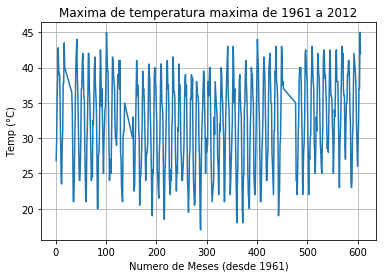

In [16]:
#calculamos la temperatura 
TXx = np.array(TXx).astype(np.double)
s1mask = np.isfinite(TXx)
plt.plot(np.arange(len(TXx))[s1mask],TXx[s1mask])
plt.title("Maxima de temperatura maxima de 1961 a 2012")
plt.ylabel("Temp (°C)")
plt.xlabel("Numero de Meses (desde 1961)")
plt.grid()
plt.show()

In [17]:
#la temperatura maxima de la column de temperaturas minimas
TNx=maxmensual("TMIN",1961,df["AÑO"][len(df)-1])

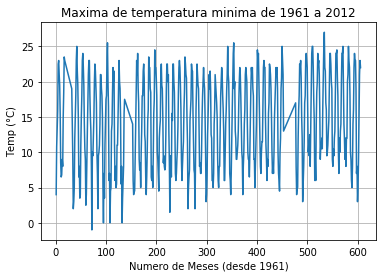

In [18]:
TNx = np.array(TNx).astype(np.double)
s1mask = np.isfinite(TNx)
plt.plot(np.arange(len(TNx))[s1mask],TNx[s1mask])
plt.title("Maxima de temperatura minima de 1961 a 2012")
plt.ylabel("Temp (°C)")
plt.xlabel("Numero de Meses (desde 1961)")
plt.grid()
plt.show()

In [19]:
#obtener la minima de la temp maxima
TXn=minmensual("TMAX",1961,df["AÑO"][len(df)-1])

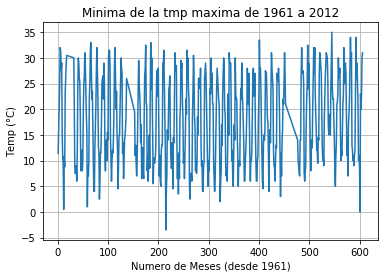

In [20]:
TXn = np.array(TXn).astype(np.double)
s1mask = np.isfinite(TXn)
plt.plot(np.arange(len(TXn))[s1mask],TXn[s1mask])
plt.title("Minima de la tmp maxima de 1961 a 2012")
plt.ylabel("Temp (°C)")
plt.xlabel("Numero de Meses (desde 1961)")
plt.grid()
plt.show()

In [21]:
#minimo mensual de la tmp minima
TNn=minmensual("TMIN",1961,df["AÑO"][len(df)-1])

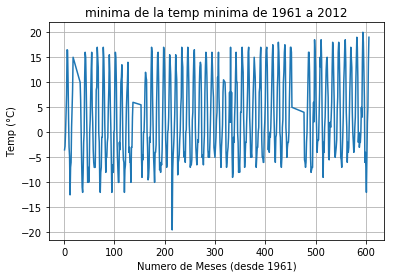

In [22]:
TNn = np.array(TNn).astype(np.double)
s1mask = np.isfinite(TNn)
plt.plot(np.arange(len(TNn))[s1mask],TNn[s1mask])
plt.title("minima de la temp minima de 1961 a 2012")
plt.ylabel("Temp (°C)")
plt.xlabel("Numero de Meses (desde 1961)")
plt.grid()
plt.show()

In [33]:
#CALCULAMOS el promedio mensual de la difernecia entre TMAX-TMIN

DTR=[]
k=0
prom=0

for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    paño=df[df["AÑO"]==i]
    for j in range(1,13):
        pmes=paño[paño["MES"]==j]
        for k in pmes.index:
            prom=prom+pmes["TDIF"][k]
            k=k+1
            
        if(k!=0):
            prom=prom/k
            DTR.append(prom)
            prom = 0
            k = 0
        else:
            DTR.append("NA")
            
        pmes=None
        

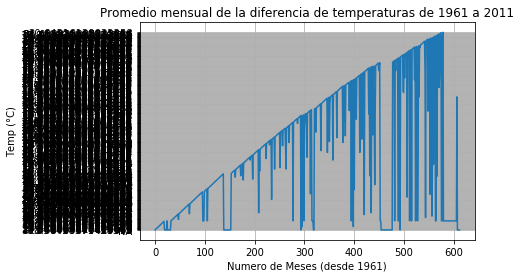

In [39]:

plt.plot(range(0,len(DTR)),DTR)
plt.title("Promedio mensual de la diferencia de temperaturas de 1961 a 2011")
plt.ylabel("Temp (°C)")
plt.xlabel("Numero de Meses (desde 1961)")
plt.grid()
plt.show()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

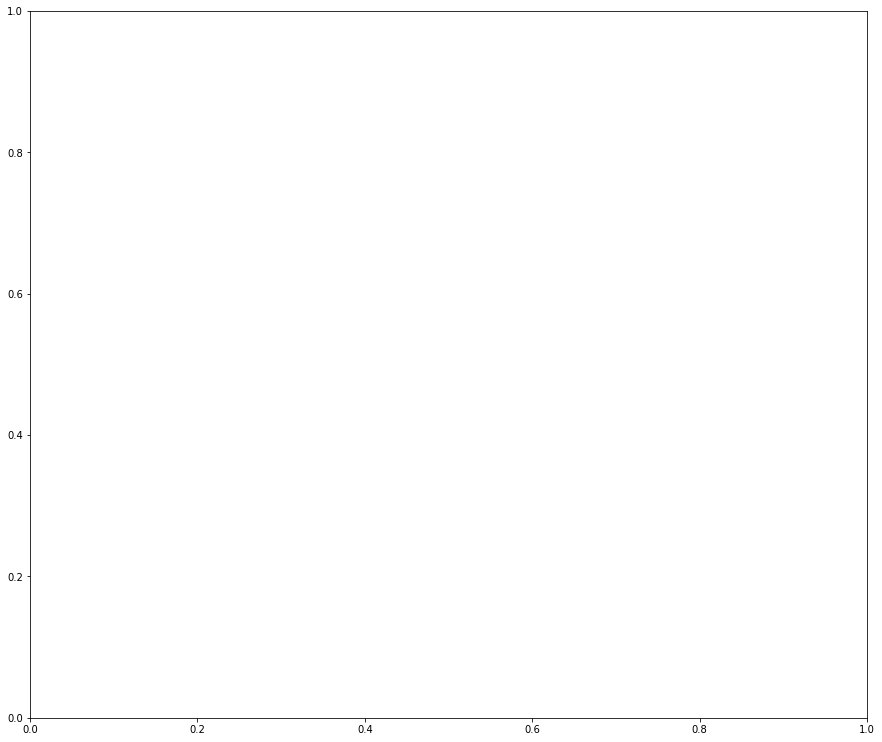

In [69]:
Rx1day = maxmensual("PRECIP",df["AÑO"][0],df["AÑO"][len(df)-1])

plt.figure(figsize = (15, 13))
plt.bar(range(0,len(Rx1day)),Rx1day)
plt.title("Precipitación diaria máxima mensual en 1 día desde 1990 a 2011")
plt.ylabel("Precipitación (mm)")
plt.xlabel("Numero de Meses (desde 1990)")
plt.grid()
plt.show()

In [51]:

Rx5day = []
maximas = -1000

for n in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    dfaño = df[df["AÑO"]==n]
    for j in range(1,13):
        dfmes = dfaño[dfaño["MES"] == j]
        indix = dfmes.index
        for i in range(0,len(indix)-4):
            temp = (dfmes["PRECIP"][indix[i+4]]+dfmes["PRECIP"][indix[i+3]]+
                    dfmes["PRECIP"][indix[i+2]]+dfmes["PRECIP"][indix[i+1]]+
                    dfmes["PRECIP"][indix[i]])
            if(maximas < temp):
                maximas = temp
        Rx5day.append(maximas)
        maximas = -1000

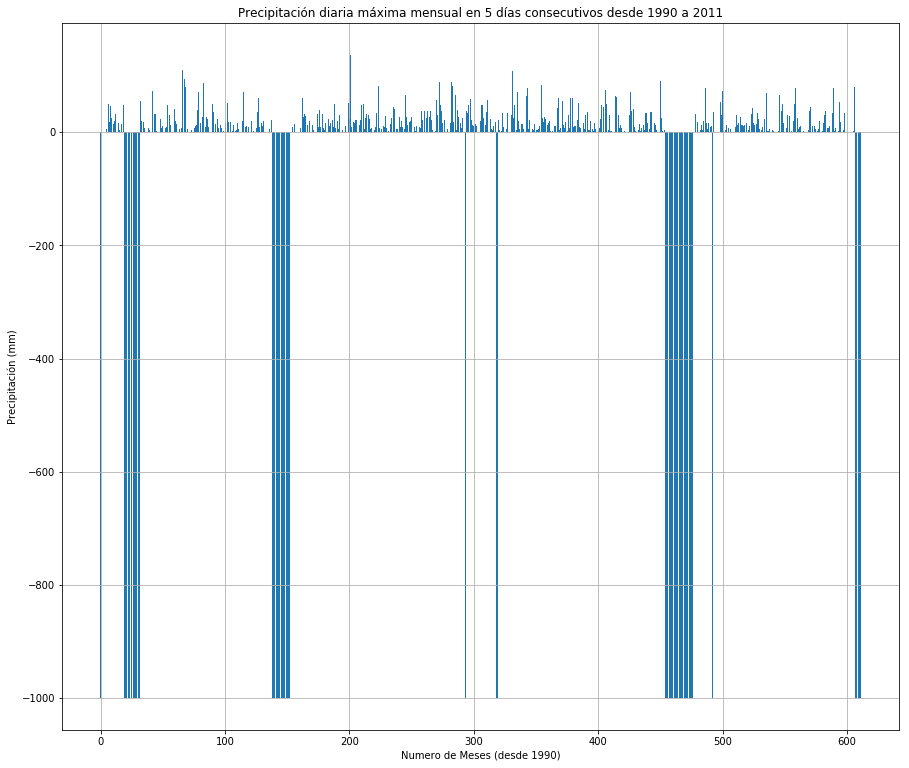

In [52]:
plt.figure(figsize = (15, 13))
plt.bar(np.arange(0,len(Rx5day)),Rx5day)
plt.title("Precipitación diaria máxima mensual en 5 días consecutivos desde 1990 a 2011")
plt.ylabel("Precipitación (mm)")
plt.xlabel("Numero de Meses (desde 1990)")
plt.grid()
plt.show()

In [24]:
SDII = []
dias = 0
for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i and df["PRECIP"][j] >= 1):
            dias = dias+1
    SDII.append(dias)
    ndias = 0

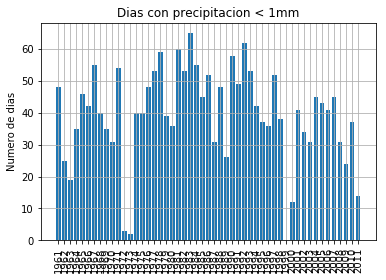

In [25]:
plt.bar(np.arange(len(veraño)),SDII)
plt.title("Dias con precipitacion < 1mm")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(veraño)), range(veraño[0],veraño[len(veraño)-1]+1), rotation = 90)
plt.grid()
plt.show()

In [26]:
R10mm=[]
dias=0

for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    daño=df[df["AÑO"]==i]
    for j in daño.index:
        if(daño["PRECIP"][j]>=10):
            dias=dias+1
        
    R10mm.append(dias)
    dias=0

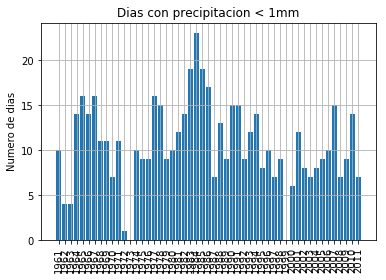

In [27]:
plt.bar(np.arange(len(veraño)),R10mm)
plt.title("Dias con precipitacion < 1mm")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(veraño)), range(veraño[0],veraño[len(veraño)-1]+1), rotation = 90)
plt.grid()
plt.show()

In [28]:
R20mm=[]
dias=0

for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    daño=df[df["AÑO"]==i]
    for j in daño.index:
        if(daño["PRECIP"][j]>=20):
            dias=dias+1
        
    R20mm.append(dias)
    dias=0
        

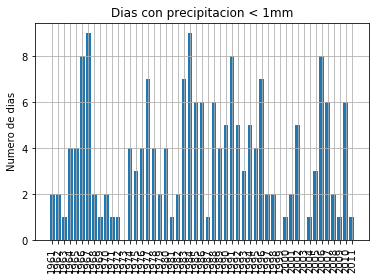

In [29]:
plt.bar(np.arange(len(veraño)),R20mm)
plt.title("Dias con precipitacion < 1mm")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(veraño)), range(veraño[0],veraño[len(veraño)-1]+1), rotation = 90)
plt.grid()
plt.show()

In [15]:
#15
CDD=[]
count1=0
count2=0
for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j]==i):
            if(df["PRECIP"][j]<1):
                count2=count2+1
            elif(df["PRECIP"][j]>=1):
                if(count2>count1):
                    count1=count2
                    count2=0             
                else:
                    count2=0
    CDD.append(count1)
    count1=0
    count2=0
                
            

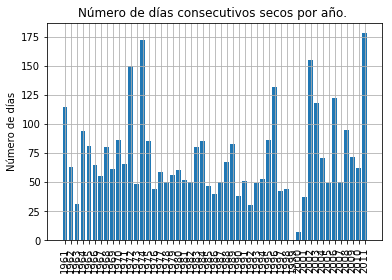

In [16]:

plt.bar(np.arange(len(veraño)),CDD)
plt.title("Número de días consecutivos secos por año. ")
plt.ylabel("Número de días")
plt.xticks(np.arange(len(veraño)), range(veraño[0],veraño[len(veraño)-1]+1), rotation = 90)
plt.grid()
plt.show()

In [21]:
#vamos a contar el numero de dias humedos consecutivos
CWD=[]
count1=0
count2=0
for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j]==i):
            if(df["PRECIP"][j]>=1):
                count2=count2+1
            elif(df["PRECIP"][j]<=1):
                if(count2>count1):
                    count1=count2
                    count2=0             
                else:
                    count2=0
    CWD.append(count1)
    count1=0
    count2=0
                
            

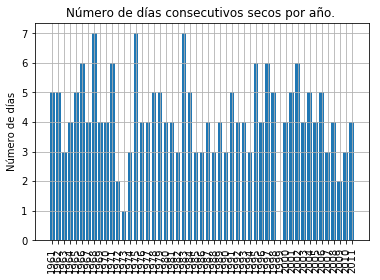

In [22]:

plt.bar(np.arange(len(veraño)),CWD)
plt.title("Número de días consecutivos secos por año. ")
plt.ylabel("Número de días")
plt.xticks(np.arange(len(veraño)), range(veraño[0],veraño[len(veraño)-1]+1), rotation = 90)
plt.grid()
plt.show()